<a href="https://colab.research.google.com/github/AmirGhnbr/statistical_time_series_analysis/blob/main/statistical_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q seaborn arch yfinance scikit-learn pmdarima mplfinance sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 10.1 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-0jre59f2
  Running command git clone --filter=blob:none --quiet https://github.com/statsmodels/statsmodels /tmp/pip-req-build-0jre59f2
  Resolved https://github.com/statsmodels/statsmodels to commit 3b61c469ed8d4a6752b5bf01390789512f81f0c6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for statsmodels: filename=statsmodels-0.15.0.dev44+g3b61c469e-cp310-cp310-linux_x86_64.whl size=23252581 sha256=b34f2e2f5a2d9a691e29d34dd2510801477e5282328c6431e6b49d1ed42538a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-lcbh7nnq/wheels/80/42/7e/512a0e0b733106dec3d046d1f77208d4f64f601a266ad861dc
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled s

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mplf
import matplotlib.pyplot as plt

In [ ]:
data = yf.download('BTC-USD',
                   period='9mo',
                   interval='1d',
                   progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-12,19052.646484,19203.199219,19029.757812,19157.445312,19157.445312,24950173846
2022-10-13,19156.966797,19453.328125,18319.822266,19382.904297,19382.904297,44219840004
2022-10-14,19382.533203,19889.146484,19115.408203,19185.656250,19185.656250,38452356727
2022-10-15,19185.437500,19212.541016,19019.250000,19067.634766,19067.634766,16192235532
2022-10-16,19068.914062,19389.603516,19068.914062,19268.093750,19268.093750,17988916650
...,...,...,...,...,...,...
2023-07-08,30346.921875,30374.437500,30080.160156,30292.541016,30292.541016,7509378699
2023-07-09,30291.611328,30427.589844,30085.591797,30171.234375,30171.234375,7903327692
2023-07-10,30172.423828,31026.083984,29985.394531,30414.470703,30414.470703,14828209155


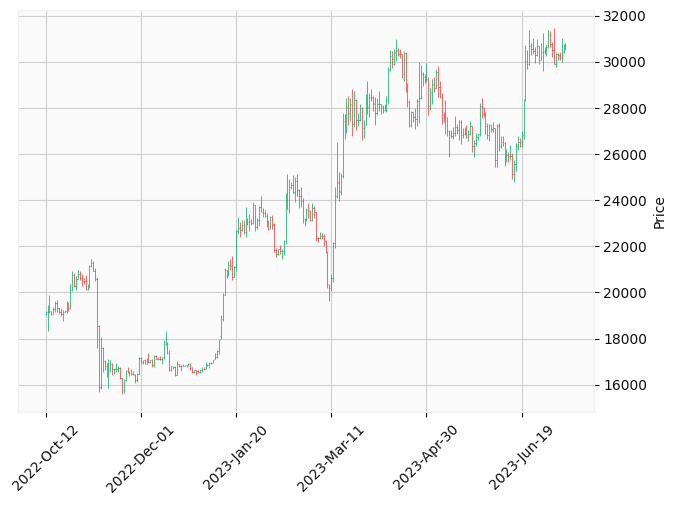

In [ ]:
mplf.plot(data, style='yahoo',warn_too_much_data=10000)

### Trying to decompose the non-stationary btc data using stl

In [ ]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

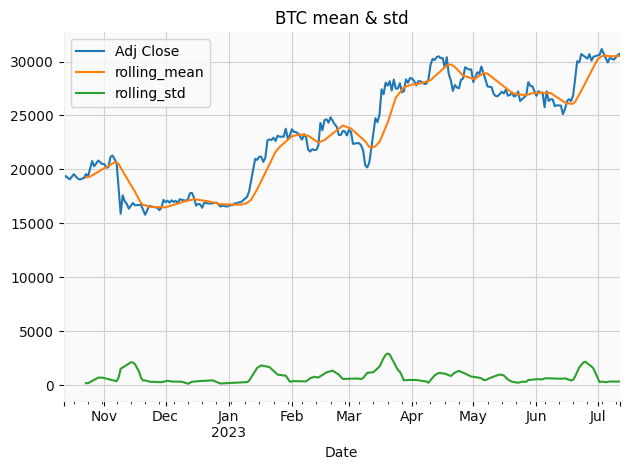

In [ ]:
WINDOW_SIZE = 12
data["rolling_mean"] = data["Adj Close"].rolling(window=WINDOW_SIZE).mean()
data["rolling_std"] = data["Adj Close"].rolling(window=WINDOW_SIZE).std()
data[['Adj Close','rolling_mean','rolling_std']].plot(title="BTC mean & std")

sns.despine()
plt.tight_layout()

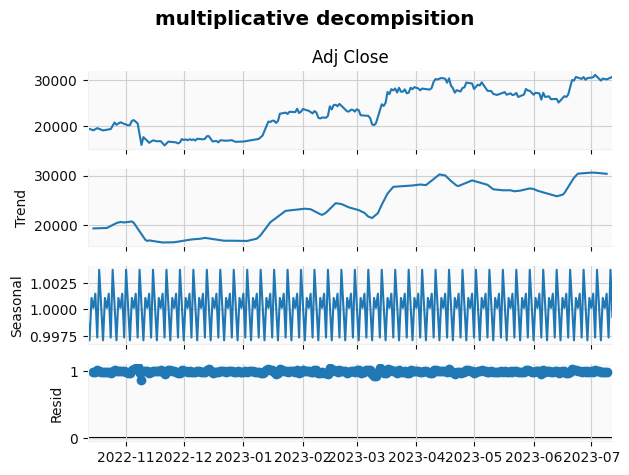

In [ ]:
decomposition_res = seasonal_decompose(data['Adj Close'],model='multiplicative')

(
    decomposition_res
    .plot()
    .suptitle('multiplicative decompisition')
)
sns.despine()
plt.tight_layout()

### Let's do STL ans mstl decomposition

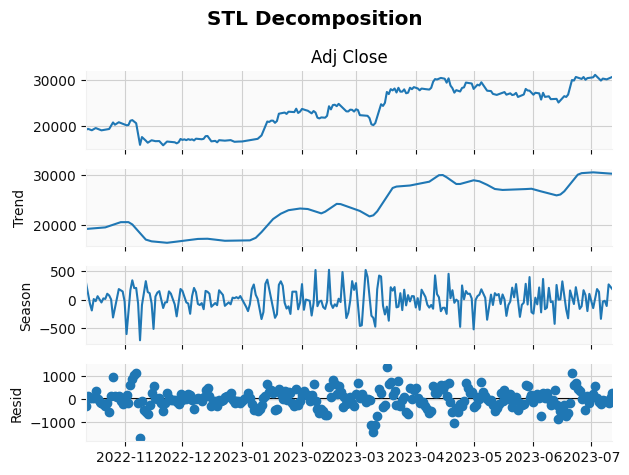

In [ ]:
from statsmodels.tsa.seasonal import STL

stl_decomposition = STL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

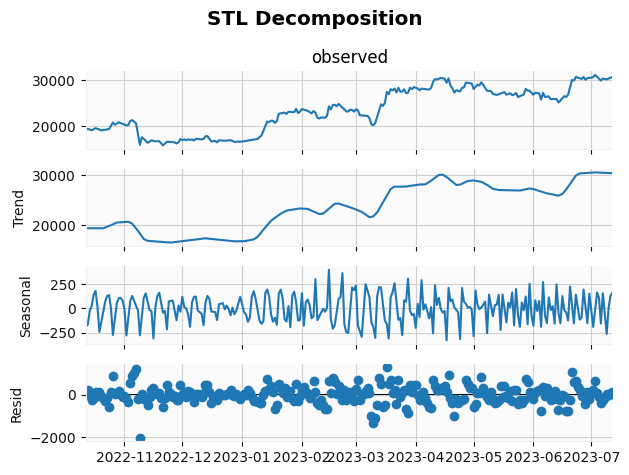

In [ ]:
from statsmodels.tsa.seasonal import MSTL

stl_decomposition = MSTL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

## Apply hodrick-prescott filter

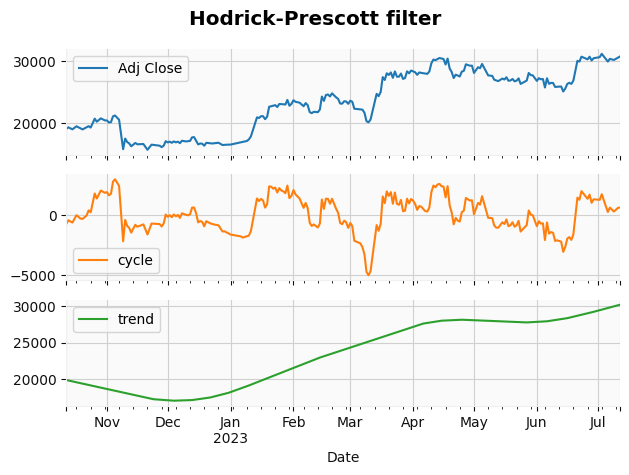

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

hp_df = data[["Adj Close"]].copy()
hp_df["cycle"], hp_df["trend"] = hpfilter(hp_df["Adj Close"], 129600)
hp_df.plot(subplots=True, title="Hodrick-Prescott filter");

sns.despine()
plt.tight_layout()

As you see BTC was finished a down trend in Dec and start new uptrend in Jan, and that trend finished in May , now new uptrend in BTC started at Jul as it was in Jan, expecting to have another 3.5 month uptrend

## Testing for Stationary in time series

Implement:

* Augmented Dickey-Fuller(ADF) test
* Kwiatkowski-philips-Schmidt-Shin (KPSS) test

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

> A unit root is a feature of a time series that makes it non-stationary, meaning that its statistical properties change over time.

> The ADF test is commonly used in econometrics and finance to test for the presence of a trend in a time series dataset. The null hypothesis of the ADF test is that the time series has a unit root, meaning that it is non-stationary.

In [ ]:
def adf_test(x):
  indeces = ["Test Statistic", "p-value","# of Lags Used", "# of Observations Used"]

  adf_test = adfuller(x, autolag='AIC')
  results = pd.Series(adf_test[0:4],index = indeces)
  for key, value in adf_test[4].items():
    results[f"Critical Value ({key})"] = value
  return results

In [ ]:
adf_test(data['Adj Close'])

Test Statistic             -0.646524
p-value                     0.860119
# of Lags Used              0.000000
# of Observations Used    273.000000
Critical Value (1%)        -3.454533
Critical Value (5%)        -2.872186
Critical Value (10%)       -2.572443
dtype: float64

the p-value in greater than the threshold value (0.05)

In [ ]:
def kpss_test(x, h0_type="c"):
 indices = ["Test Statistic", "p-value", "# of Lags"]
 kpss_test = kpss(x, regression=h0_type);
 results = pd.Series(kpss_test[0:3], index=indices)

 for key, value in kpss_test[3].items():
    results[f"Critical Value ({key})"] = value
 return results

In [ ]:
kpss_test(data['Adj Close'])

<ipython-input-15-ca4edb5552cd>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(x, regression=h0_type);


Test Statistic            2.206747
p-value                   0.010000
# of Lags                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

* The null hypothesis of the kpss test states that the time series is stationary. With a p-value of 0.01 (less than the threshold 0.05) which rejects the hypothesis => time series is non-stationary


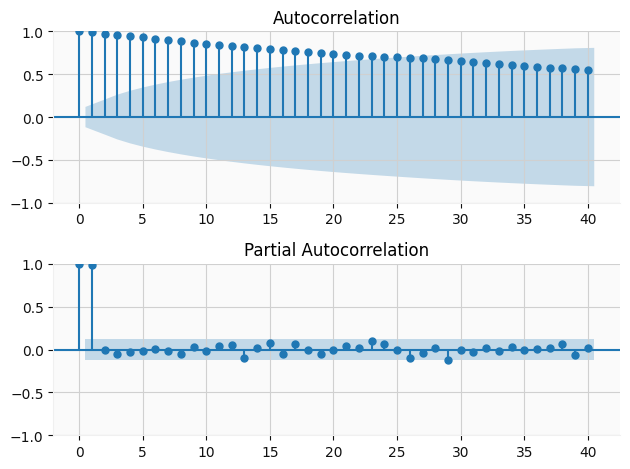

In [ ]:
def plot_acf_pacf(data):
    N_LAGS= 40
    SIGNIFICANCE_LEVEL = 0.05

    fig, ax = plt.subplots(2, 1)
    plot_acf(data, ax=ax[0],lags=N_LAGS,
    alpha=SIGNIFICANCE_LEVEL);
    plot_pacf(data, ax=ax[1],lags=N_LAGS,
    alpha=SIGNIFICANCE_LEVEL);

    sns.despine()
    plt.tight_layout()


plot_acf_pacf(data['Adj Close'])

### Zivot Andrews test

In [ ]:
from arch.unitroot import ZivotAndrews
za = ZivotAndrews(data['Adj Close'])
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                 -3.220
P-value                         0.832
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


## Make time series stationary

Calculating the log-return of the data will make it a stationary

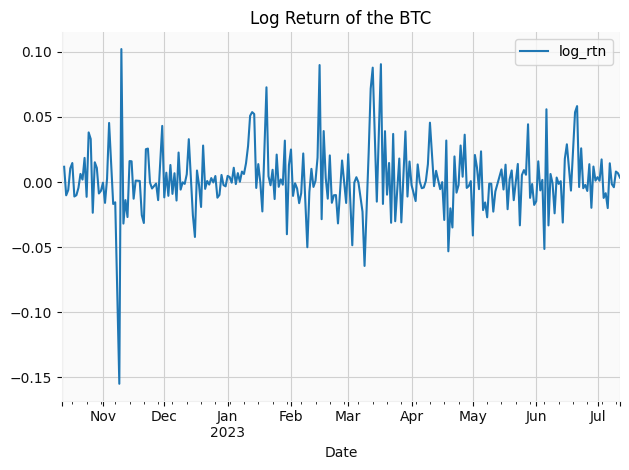

In [ ]:
data['log_rtn']=np.log(data['Adj Close']/data['Adj Close'].shift(1))

(
    data.loc[:,['log_rtn']]
    .plot(title='Log Return of the BTC')
)
sns.despine()
plt.tight_layout()

In [ ]:
from arch.unitroot import ADF
adf=ADF(data['log_rtn'].dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -15.895
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
adf_test(data['log_rtn'].dropna())

Test Statistic           -1.589501e+01
p-value                   8.455395e-29
# of Lags Used            0.000000e+00
# of Observations Used    2.720000e+02
Critical Value (1%)      -3.454622e+00
Critical Value (5%)      -2.872225e+00
Critical Value (10%)     -2.572464e+00
dtype: float64

In [ ]:
kpss_test(data['log_rtn'].dropna())

<ipython-input-15-ca4edb5552cd>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(x, regression=h0_type);


Test Statistic           0.081566
p-value                  0.100000
# of Lags                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

the data is now stationary

## Modeling time series with exponential smoothing methods

In [ ]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing,
                                         SimpleExpSmoothing,
                                         Holt)

In [ ]:
train_size = int(0.8 * len(data['Adj Close'].dropna()))
test_len = len(data['Adj Close'].dropna())-train_size
df_train = data['Adj Close'].dropna().iloc[:train_size]
df_test = data['Adj Close'].dropna().iloc[train_size:]

In [ ]:
ses_1 = SimpleExpSmoothing(df_train).fit(smoothing_level=0.5)
ses_forecast_1 = ses_1.forecast(test_len);

ses_2 = SimpleExpSmoothing(df_train,initialization_method="estimated").fit()
ses_forecast_2 = ses_2.forecast(test_len);

ses_1.params_formatted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,name,param,optimized
smoothing_level,alpha,0.500000,False
initial_level,l.0,19157.445312,False


In [ ]:
ses_1.summary()

Dep. Variable:,Adj Close,No. Observations:,219
Model:,SimpleExpSmoothing,SSE,112179517.122
Optimized:,False,AIC,2883.092
Trend:,None,BIC,2889.870
Seasonal:,None,AICC,2883.279
Seasonal Periods:,None,Date:,"Wed, 12 Jul 2023"
Box-Cox:,False,Time:,08:35:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,19157.445,l.0,False


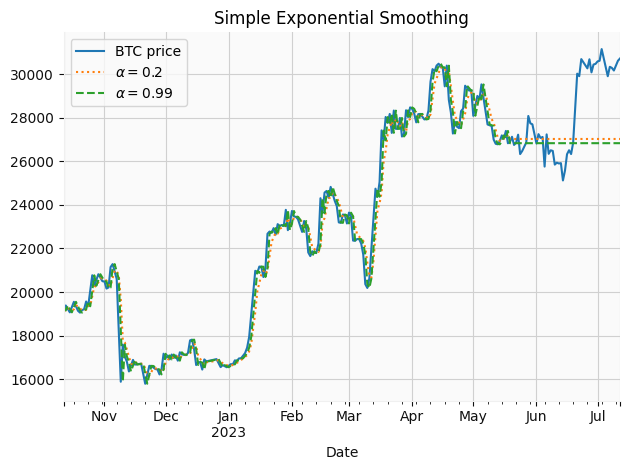

In [ ]:
ses_df = data.copy()
ses_df["ses_1"] = pd.concat([ses_1.fittedvalues,ses_forecast_1])
ses_df["ses_2"] = pd.concat([ses_2.fittedvalues,ses_forecast_2])

opt_alpha = ses_2.model.params["smoothing_level"]

fig, ax = plt.subplots()
ses_df[['Adj Close','ses_1','ses_2']].plot(style=["-",":","--"], ax=ax,
                     title="Simple Exponential Smoothing")
labels = [
    "BTC price",
    r"$\alpha=0.2$",
    r"$\alpha={0:.2f}$".format(opt_alpha),
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

fit 3 varriants of HOLT's linear trend model and create forecast

In [ ]:
# Holt's model with linear trend
hs_1 = Holt(df_train,initialization_method="estimated").fit()
hs_forecast_1 = hs_1.forecast(test_len)

# Holt's model with exponential trend
hs_2 = Holt(df_train, exponential=True,damped_trend=True
            ,initialization_method="estimated").fit()
# equivalent to ExponentialSmoothing(df_train, trend="mul").fit()
hs_forecast_2 = hs_2.forecast(test_len)

# Holt's model with exponential trend and damping
hs_3 = Holt(df_train, exponential=False,
            damped_trend=True).fit()
hs_forecast_3 = hs_3.forecast(test_len)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
hs_3.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995000,True
smoothing_trend,beta,0.023690,True
initial_level,l.0,19157.445312,False
initial_trend,b.0,223.204395,False
damping_trend,phi,0.990000,True


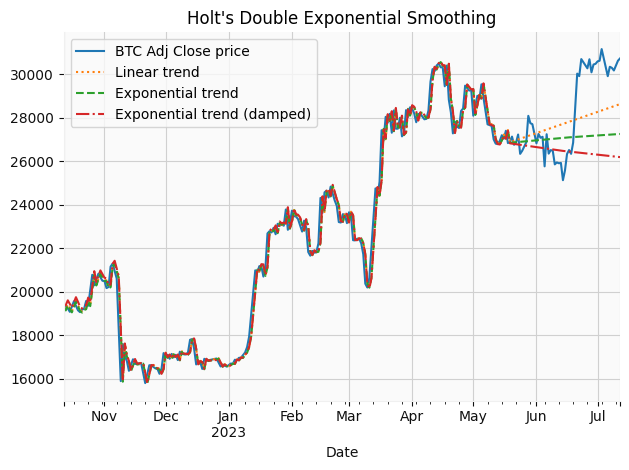

In [ ]:
hs_df = data.copy()
hs_df["hs_1"] = pd.concat([hs_1.fittedvalues,hs_forecast_1])
hs_df["hs_2"] = pd.concat([hs_2.fittedvalues,hs_forecast_2])
hs_df["hs_3"] = pd.concat([hs_3.fittedvalues,hs_forecast_3])

fig, ax = plt.subplots()
hs_df[['Adj Close','hs_1','hs_2','hs_3']].plot(style=["-",":","--", "-."], ax=ax,
                    title="Holt's Double Exponential Smoothing")
labels = [
    "BTC Adj Close price",
    "Linear trend",
    "Exponential trend",
    "Exponential trend (damped)",
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

In [ ]:
SEASONAL_PERIODS = 7

# Holt-Winters' model with exponential trend(long term forecasting better)
hw_1 = ExponentialSmoothing(df_train,
                            trend="mul",
                            seasonal="add",
                            # use_boxcox=True,
                            initialization_method="estimated",
                            seasonal_periods=SEASONAL_PERIODS).fit()
hw_forecast_1 = hw_1.forecast(test_len)

# Holt-Winters' model with exponential trend and damping(short term better)
hw_2 = ExponentialSmoothing(df_train,
                            trend="mul",
                            seasonal="add",
                            # use_boxcox=True,
                            seasonal_periods=SEASONAL_PERIODS,
                            initialization_method="estimated",
                            damped_trend=True).fit()
hw_forecast_2 = hw_2.forecast(test_len)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
hw_2.params_formatted

,name,param,optimized
smoothing_level,alpha,0.924286,True
smoothing_trend,beta,0.034233,True
smoothing_seasonal,gamma,0.075714,True
initial_level,l.0,19101.154167,True
initial_trend,b.0,1.002396,True
damping_trend,phi,0.990000,True
initial_seasons.0,s.0,-591.604828,True
initial_seasons.1,s.1,-190.988582,True
initial_seasons.2,s.2,116.997606,True
initial_seasons.3,s.3,151.737959,True


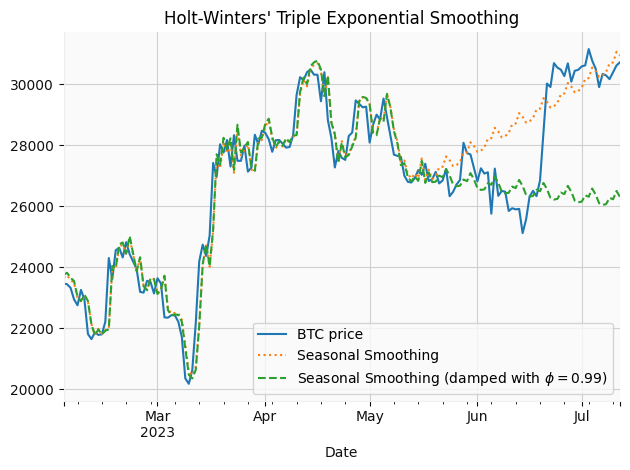

In [ ]:
hw_df = data.copy()
hw_df["hw_1"] = pd.concat([hw_1.fittedvalues,hw_forecast_1])
hw_df["hw_2"] = pd.concat([hw_2.fittedvalues,hw_forecast_2])

fig, ax = plt.subplots()
hw_df = hw_df[hw_df.index>'2023-02']
hw_df[['Adj Close','hw_1','hw_2']].plot(
    style=["-",":","--"], ax=ax,
    title="Holt-Winters' Triple Exponential Smoothing"
)
phi = hw_2.model.params["damping_trend"]

labels = [
    "BTC price",
    "Seasonal Smoothing",
    f"Seasonal Smoothing (damped with $\phi={phi:.2f}$)"
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

## Auto ETS

In [ ]:
from sktime.forecasting.ets import AutoETS
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
auto_ets = AutoETS(
    auto=True,
    # trend='mul',
    # seasonal='add',
    n_jobs=-1, sp=7)
auto_ets.fit(df_train.to_period())
auto_ets_fcst = auto_ets.predict(fh=list(range(1, test_len)))


In [ ]:
print(auto_ets.summary())

                                 ETS Results                                  
Dep. Variable:              Adj Close   No. Observations:                  219
Model:                       ETS(MNN)   Log Likelihood               -1708.425
Date:                Wed, 12 Jul 2023   AIC                           3422.850
Time:                        09:18:53   BIC                           3433.017
Sample:                    10-12-2022   HQIC                          3426.956
                         - 05-18-2023   Scale                            0.001
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.067     15.000      0.000       0.869       1.131
initial_level    1.928e+04    530.861     36.309      0.000    1.82e+04    2.03e+04
Ljung-Box (Q):                  

<ipython-input-96-fec1b09f994d>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(auto_ets_fcst)


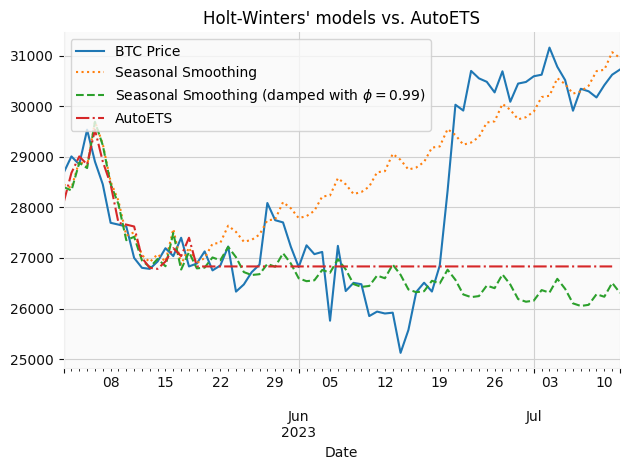

In [ ]:
auto_ets_df = hw_df.to_period().copy()
auto_ets_df["auto_ets"] = (
    auto_ets
    ._fitted_forecaster
    .fittedvalues
    .append(auto_ets_fcst)
)

fig, ax = plt.subplots()
auto_ets_df=auto_ets_df[auto_ets_df.index>'2023-05']
auto_ets_df[['Adj Close','hw_1','hw_2','auto_ets']].plot(
    style=["-",":","--","-."], ax=ax,
    title="Holt-Winters' models vs. AutoETS"
)
labels = [
    "BTC Price",
    "Seasonal Smoothing",
    f"Seasonal Smoothing (damped with $\phi={phi:.2f}$)",
    "AutoETS",
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

## Modeling time series with ARIMA class models

In [97]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [98]:
import math
(math.e ** np.log(data['Adj Close']/data['Adj Close'].shift(1)).sum())*19955.44

32003.006927732527

In [99]:
train_size = int(0.8 * len(data['Adj Close'].dropna()))
test_len = len(data['Adj Close'].dropna())-train_size
df_train = data.iloc[:train_size]
df_test = data.iloc[train_size:]
len(df_train), len(df_test)

(219, 55)

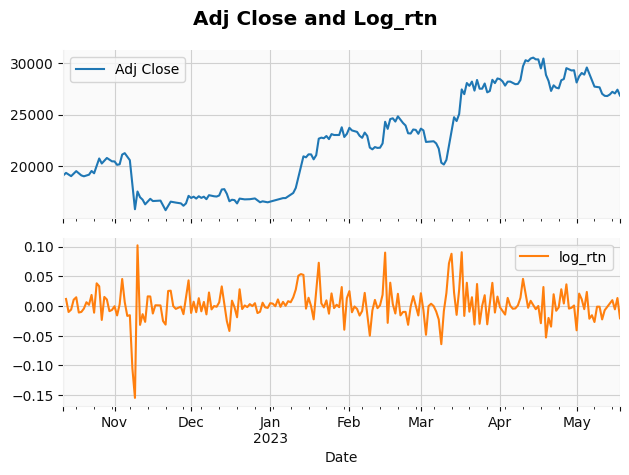

In [100]:
df_train[['Adj Close','log_rtn']].plot(subplots=True,
                                       title='Adj Close and Log_rtn')

sns.despine()
plt.tight_layout()

In [101]:
arima_111 = ARIMA(
    df_train['log_rtn'],order=(1,1,1)
).fit()
print(arima_111.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                log_rtn   No. Observations:                  219
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 463.669
Date:                Wed, 12 Jul 2023   AIC                           -921.337
Time:                        09:30:32   BIC                           -911.184
Sample:                    10-12-2022   HQIC                          -917.236
                         - 05-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0643      0.030      2.113      0.035       0.005       0.124
ma.L1         -0.9999      3.278     -0.305      0.760      -7.425       5.425
sigma2         0.0007      0.002      0.306      0.7

In [102]:
arima_202 = ARIMA(
    df_train["log_rtn"], order=(2, 0, 2)
).fit()
print(arima_202.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                log_rtn   No. Observations:                  219
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 476.903
Date:                Wed, 12 Jul 2023   AIC                           -941.805
Time:                        09:30:37   BIC                           -921.471
Sample:                    10-12-2022   HQIC                          -933.593
                         - 05-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.002      0.704      0.482      -0.003       0.006
ar.L1          0.2652     16.166      0.016      0.987     -31.420      31.951
ar.L2          0.0957      6.481      0.015      0.9

In [103]:
data['pred_111_log_rtn']= pd.concat([df_train['log_rtn'], arima_111.forecast(test_len)])

forecast = arima_111.forecast(test_len)
pred_price_list = np.exp(data['pred_111_log_rtn'].cumsum())

data['pred_111'] = np.array(pred_price_list)* data['Adj Close'][0]
data['pred_111'].tail()

Date
2023-07-08    28982.197613
2023-07-09    29026.910794
2023-07-10    29071.692957
2023-07-11    29116.544210
2023-07-12    29161.464659
Name: pred_111, dtype: float64

In [104]:
data['pred_202_log_rtn']= pd.concat([df_train["log_rtn"], arima_202.forecast(test_len)])

forecast = arima_202.forecast(test_len)
pred_price_list = np.exp(data['pred_202_log_rtn'].cumsum())

data['pred_202'] = np.array(pred_price_list)* data['Adj Close'][0]
data['pred_202'].tail(),data['Adj Close'][-1]

(Date
 2023-07-08    28967.100320
 2023-07-09    29011.687443
 2023-07-10    29056.343196
 2023-07-11    29101.067684
 2023-07-12    29145.861014
 Name: pred_202, dtype: float64,
 30723.244140625)

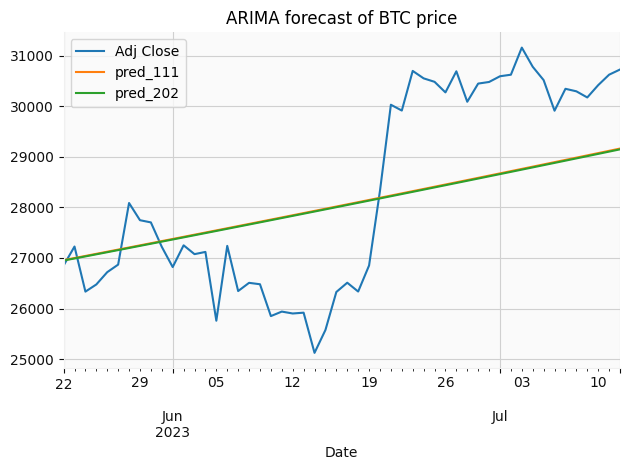

In [105]:
latest_data = data[data.index>'2023-05-20']


(
    latest_data[["Adj Close", "pred_111", "pred_202"]]
    .iloc[1:]
    .plot(title="ARIMA forecast of BTC price")
);

sns.despine()
plt.tight_layout()

In [106]:
mape_111 = mean_absolute_percentage_error(
    data["Adj Close"].iloc[-test_len:],
    data["pred_111"].iloc[-test_len:]
)

mape_202 = mean_absolute_percentage_error(
    data["Adj Close"].iloc[-test_len:],
    data["pred_202"].iloc[-test_len:]
)

print(f"MAPE of ARIMA(1,1,1): {100 * mape_111:.2f}%")
print(f"MAPE of ARIMA(2,0,2): {100 * mape_202:.2f}%")



MAPE of ARIMA(1,1,1): 4.47%
MAPE of ARIMA(2,0,2): 4.47%


In [107]:
preds_df = arima_202.get_forecast(test_len).summary_frame()
preds_df.columns = ["fcst", "fcst_se", "ci_lower", "ci_upper"]
plot_df = df_test[["log_rtn"]].join(np.exp(preds_df))
plot_df.head()

,log_rtn,fcst,fcst_se,ci_lower,ci_upper
Date,,,,,
2023-05-19,0.002156,1.000360,1.027512,0.948538,1.055015
2023-05-20,0.008866,1.001201,1.027561,0.949246,1.055999
2023-05-21,-0.013947,1.001337,1.027566,0.949365,1.056153
2023-05-22,0.003636,1.001453,1.027568,0.949473,1.056279
2023-05-23,0.013849,1.001497,1.027568,0.949514,1.056326


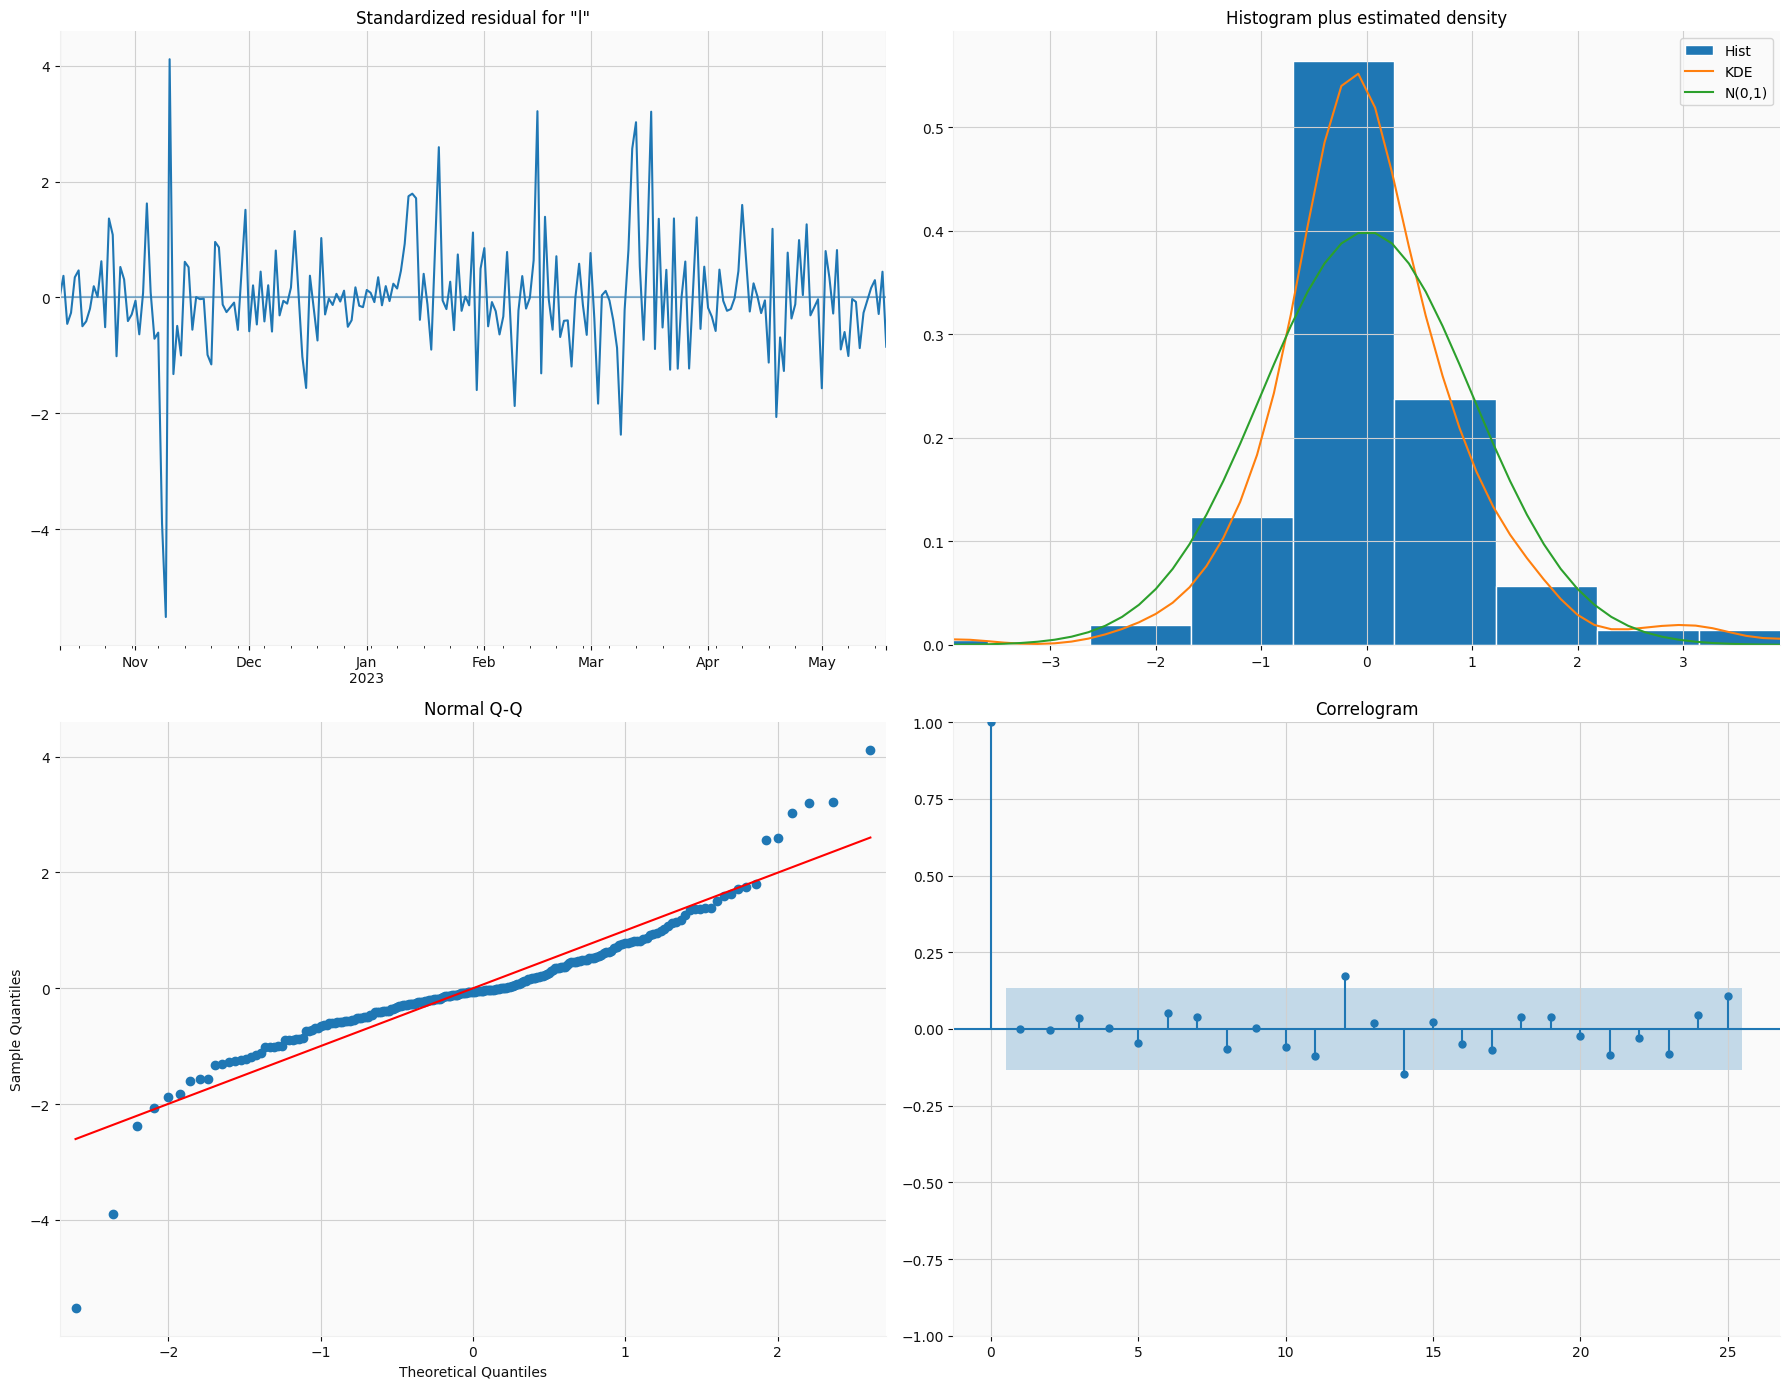

In [108]:
arima_202.plot_diagnostics(figsize=(18, 14), lags=25)

sns.despine()
plt.tight_layout()

## applying Ljung-Box's test for no autocorrelation

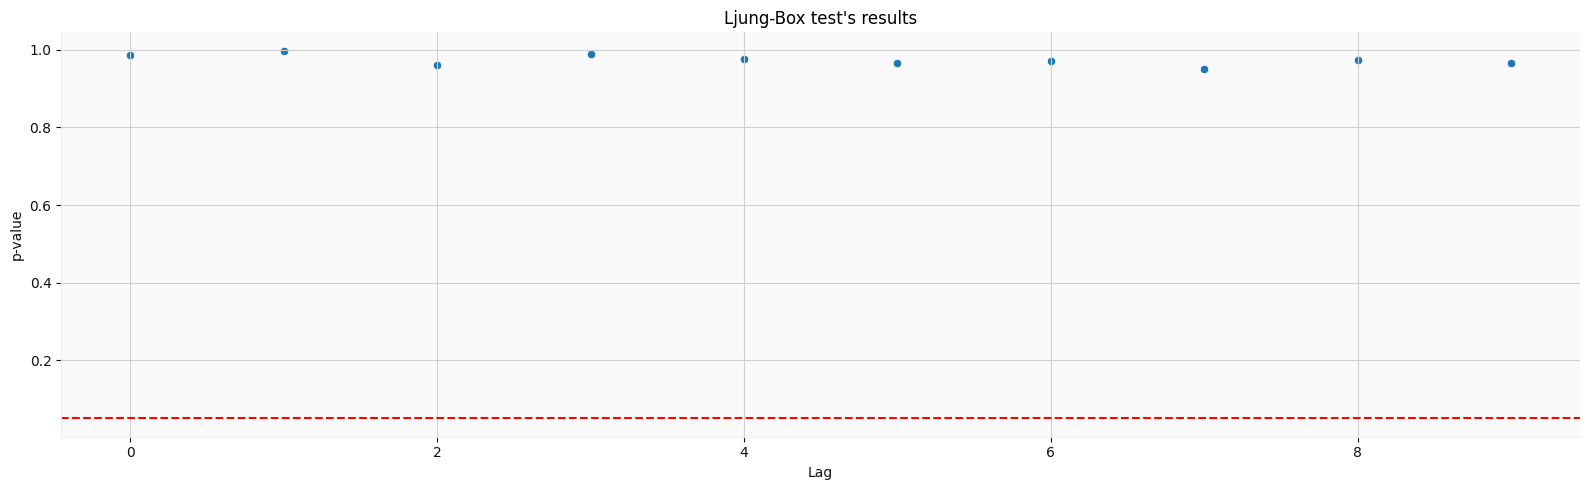

In [109]:
ljung_box_results = arima_202.test_serial_correlation(method="ljungbox")
ljung_box_pvals = ljung_box_results[0][1]

fig, ax = plt.subplots(1, figsize=[16, 5])
sns.scatterplot(x=range(len(ljung_box_pvals)),
                y=ljung_box_pvals,
                ax=ax)
ax.axhline(0.05, ls="--", c="r")
ax.set(title="Ljung-Box test's results",
       xlabel="Lag",
       ylabel="p-value")

sns.despine()
plt.tight_layout()

## Finding the best-fitting ARIMA model with auto-ARIMA

In [143]:
import pmdarima as pm

In [144]:
TEST_LENGTH = test_len
df_train = data.iloc[:-TEST_LENGTH]
df_test = data.iloc[-TEST_LENGTH:]

In [145]:
auto_arima = pm.auto_arima(df_train['log_rtn'].dropna(),
                           test="adf",
                           seasonal=False,
                           with_intercept=False,
                           stepwise=True,
                           suppress_warnings=True,
                           trace=True)

print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-943.279, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-950.144, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-949.001, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-948.974, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-947.248, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-948.847, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.846 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  218
Model:                        SARIMAX   Log Likelihood                 476.072
Date:                Wed, 12 Jul 2023   AIC                           -950.144
Time:                        09:46:10   BIC                           -946.760
Sample:                    10-13-2022   HQIC                          -948.777
          

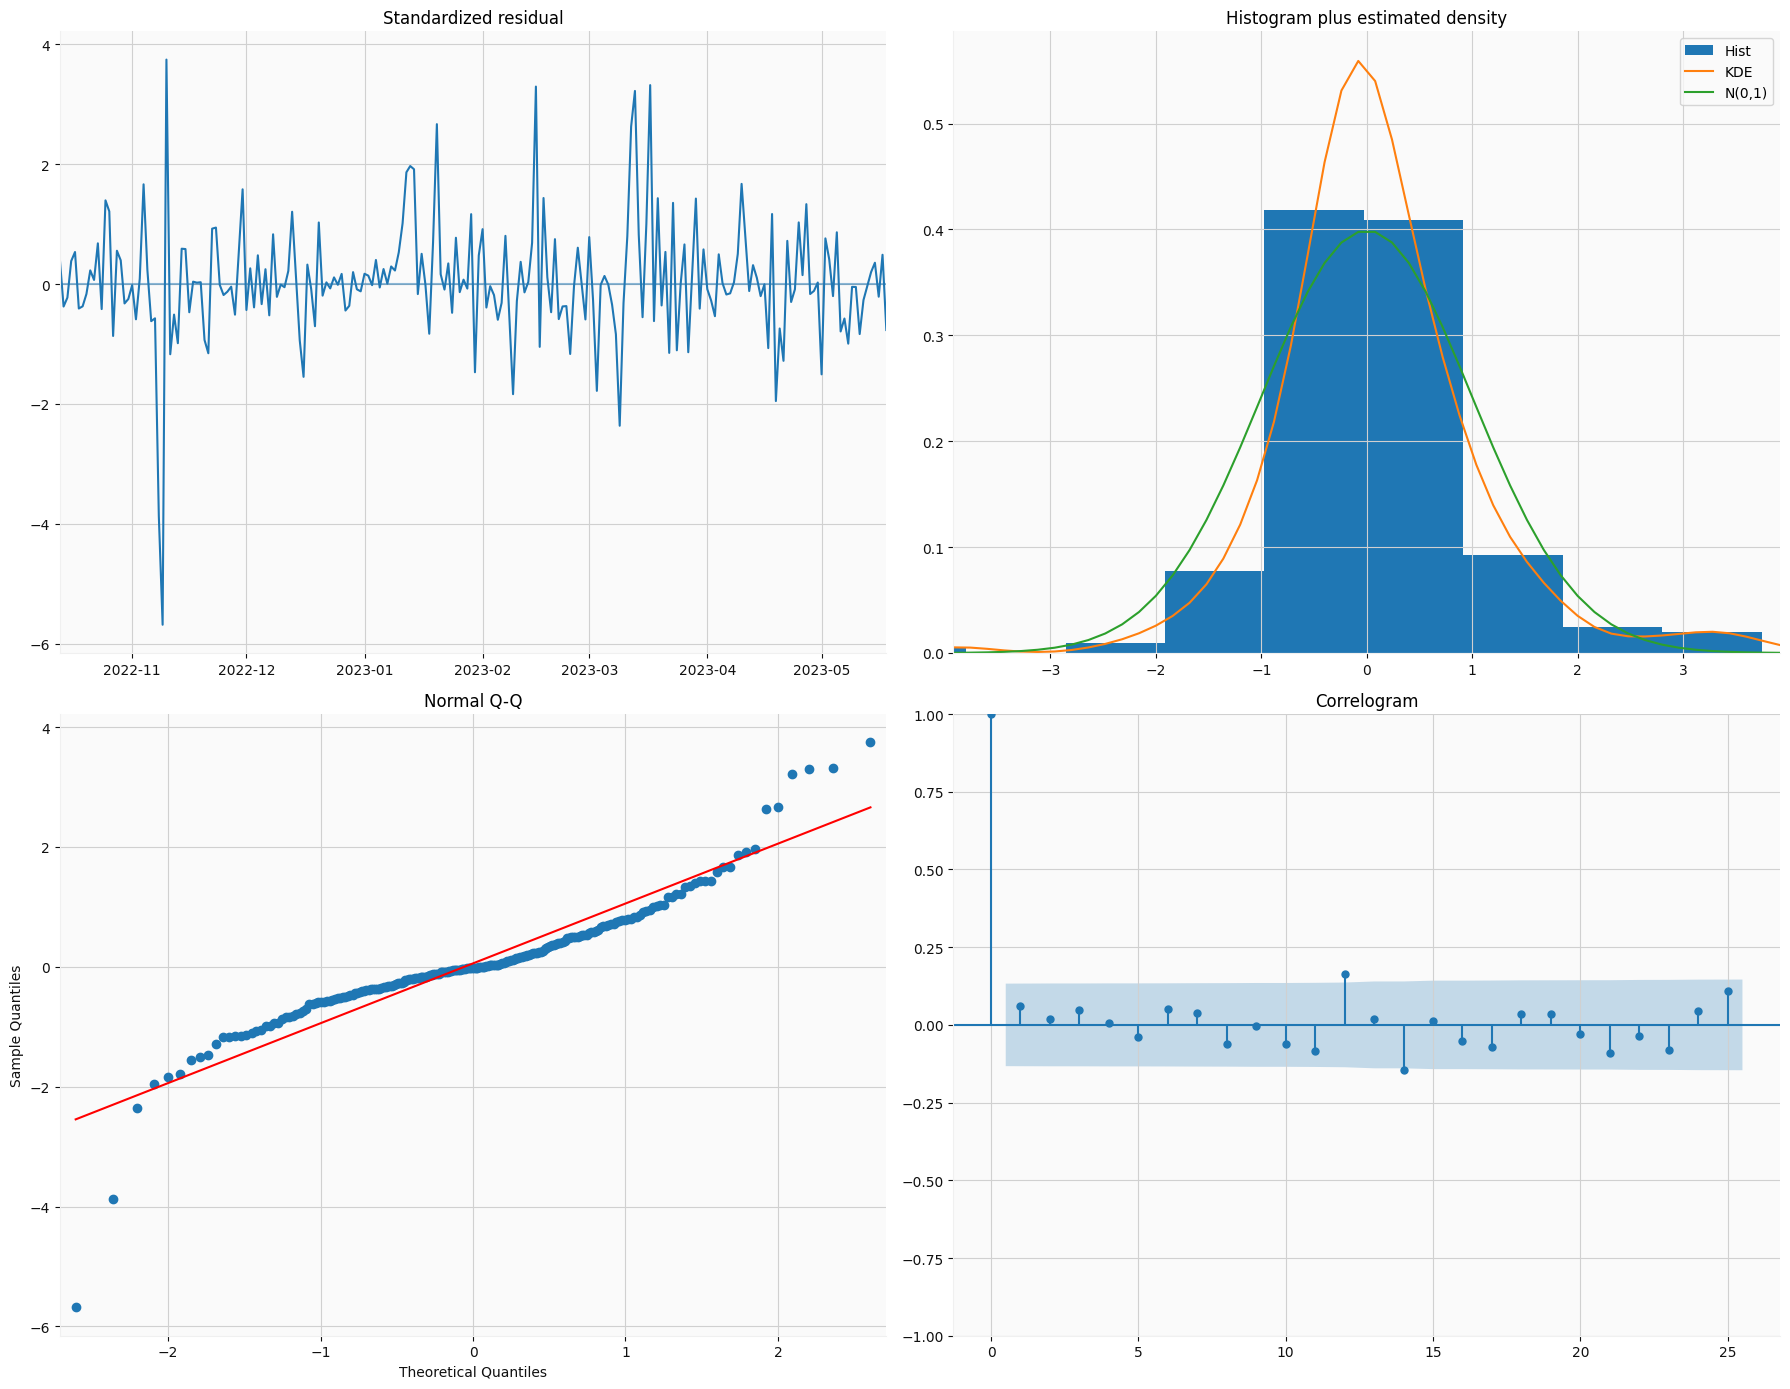

In [146]:
auto_arima.plot_diagnostics(figsize=(18, 14), lags=25)

sns.despine()
plt.tight_layout()

In [147]:
auto_sarima = pm.auto_arima(df_train['log_rtn'].dropna(),
                            test="adf",
                            seasonal=True,
                            m=7,
                            with_intercept=False,
                            stepwise=True,
                            suppress_warnings=True,
                            trace=True)
print(auto_sarima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7]             : AIC=-939.838, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=-950.144, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[7]             : AIC=-947.371, Time=0.39 sec
 ARIMA(0,0,1)(0,0,1)[7]             : AIC=-947.481, Time=0.26 sec
 ARIMA(0,0,0)(1,0,0)[7]             : AIC=-948.504, Time=0.20 sec
 ARIMA(0,0,0)(0,0,1)[7]             : AIC=-948.635, Time=0.28 sec
 ARIMA(0,0,0)(1,0,1)[7]             : AIC=-947.225, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[7]             : AIC=-949.001, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[7]             : AIC=-948.974, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[7]             : AIC=-947.248, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=-948.847, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7]          
Total fit time: 2.356 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

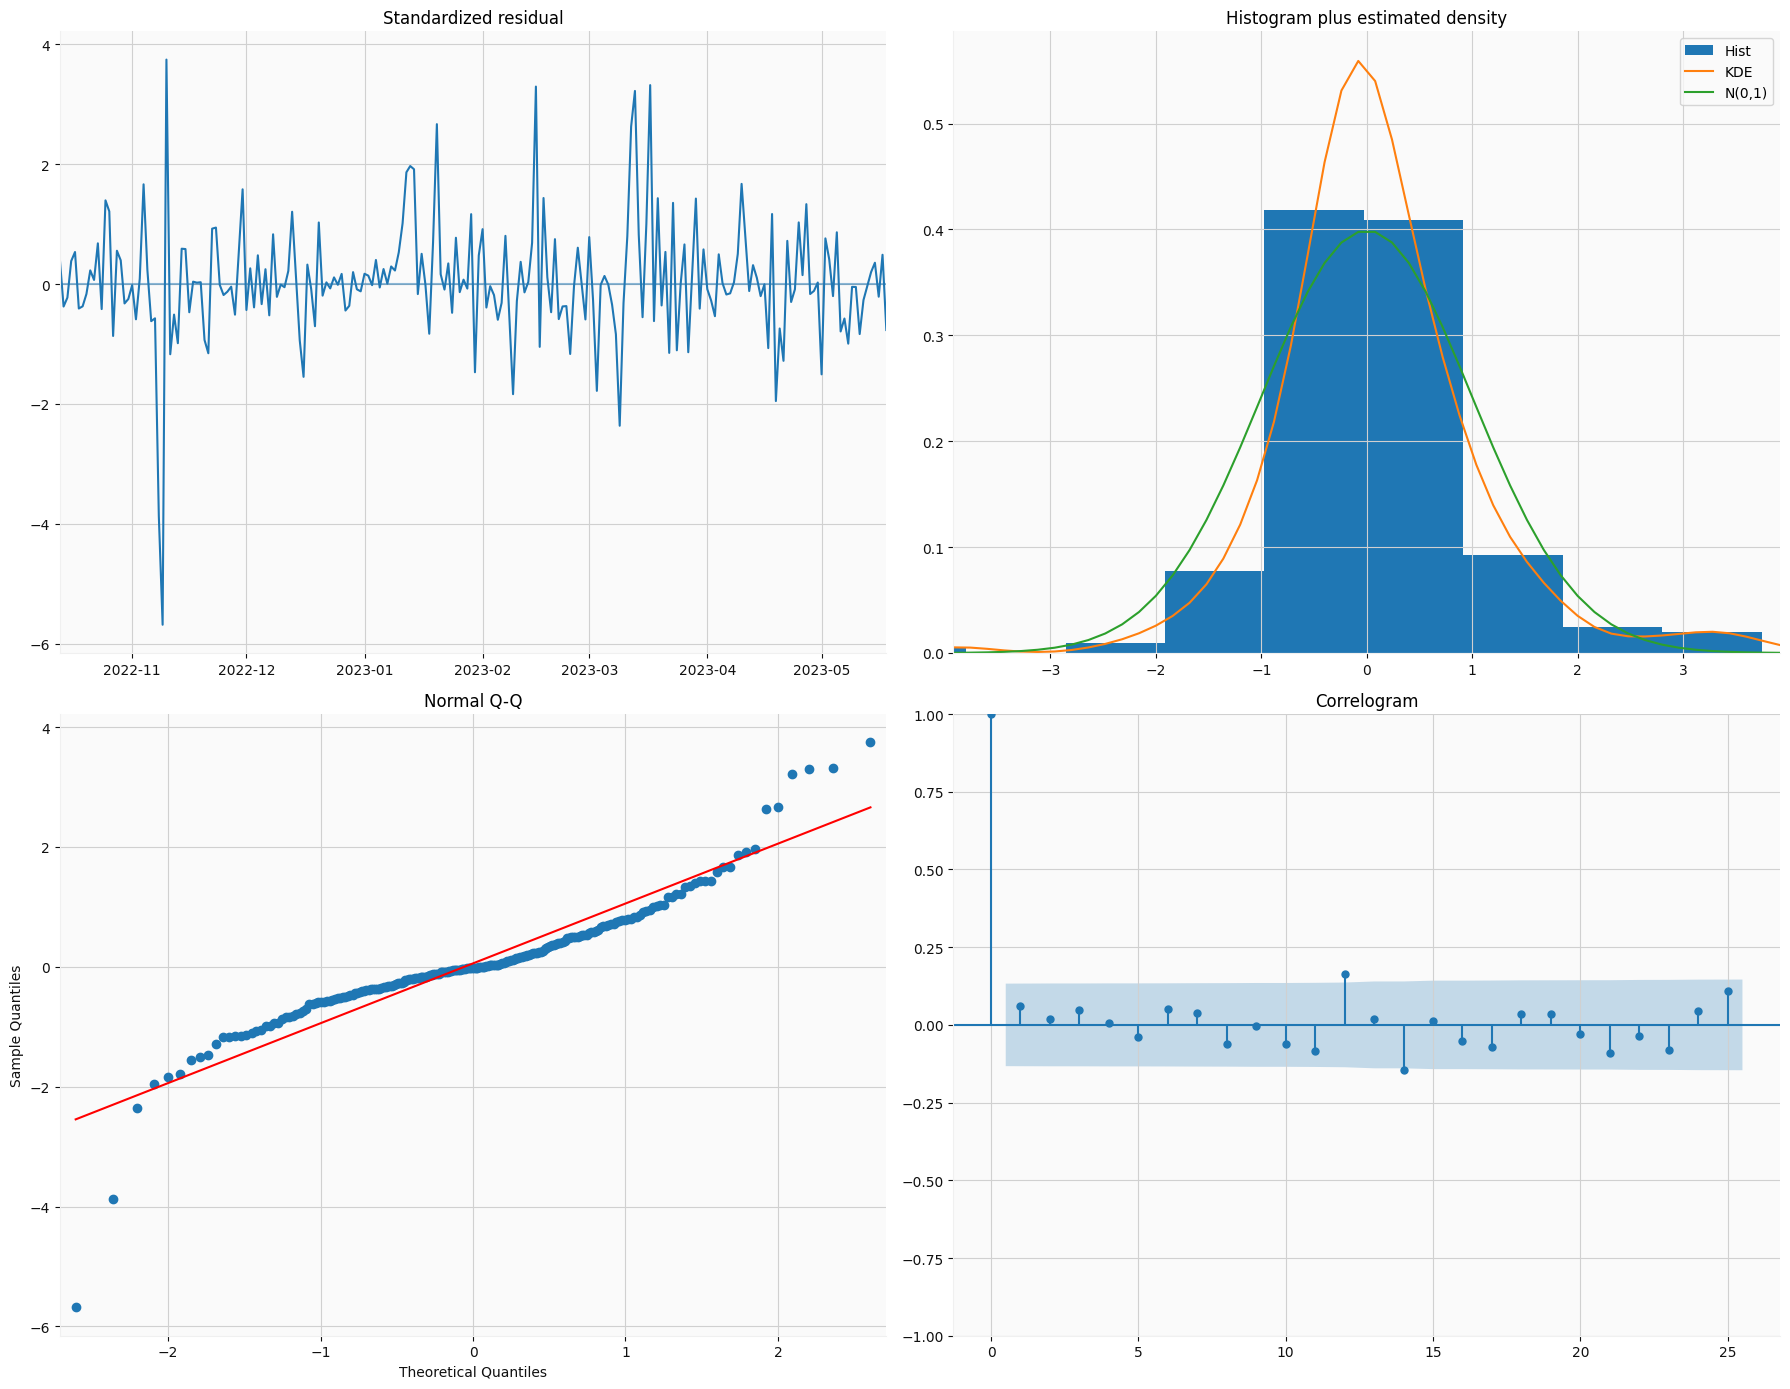

In [148]:
auto_sarima.plot_diagnostics(figsize=(18, 14), lags=25);

sns.despine()
plt.tight_layout()

In [149]:
auto_sarima.predict(test_len)

2023-05-19    0.0
2023-05-20    0.0
2023-05-21    0.0
2023-05-22    0.0
2023-05-23    0.0
2023-05-24    0.0
2023-05-25    0.0
2023-05-26    0.0
2023-05-27    0.0
2023-05-28    0.0
2023-05-29    0.0
2023-05-30    0.0
2023-05-31    0.0
2023-06-01    0.0
2023-06-02    0.0
2023-06-03    0.0
2023-06-04    0.0
2023-06-05    0.0
2023-06-06    0.0
2023-06-07    0.0
2023-06-08    0.0
2023-06-09    0.0
2023-06-10    0.0
2023-06-11    0.0
2023-06-12    0.0
2023-06-13    0.0
2023-06-14    0.0
2023-06-15    0.0
2023-06-16    0.0
2023-06-17    0.0
2023-06-18    0.0
2023-06-19    0.0
2023-06-20    0.0
2023-06-21    0.0
2023-06-22    0.0
2023-06-23    0.0
2023-06-24    0.0
2023-06-25    0.0
2023-06-26    0.0
2023-06-27    0.0
2023-06-28    0.0
2023-06-29    0.0
2023-06-30    0.0
2023-07-01    0.0
2023-07-02    0.0
2023-07-03    0.0
2023-07-04    0.0
2023-07-05    0.0
2023-07-06    0.0
2023-07-07    0.0
2023-07-08    0.0
2023-07-09    0.0
2023-07-10    0.0
2023-07-11    0.0
2023-07-12    0.0
Freq: D, d

In [150]:
df_test["auto_arima"] = auto_arima.predict(test_len)
df_test["auto_sarima"] = auto_sarima.predict(test_len)

<ipython-input-150-7ab3e1d87621>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["auto_arima"] = auto_arima.predict(test_len)
<ipython-input-150-7ab3e1d87621>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["auto_sarima"] = auto_sarima.predict(test_len)


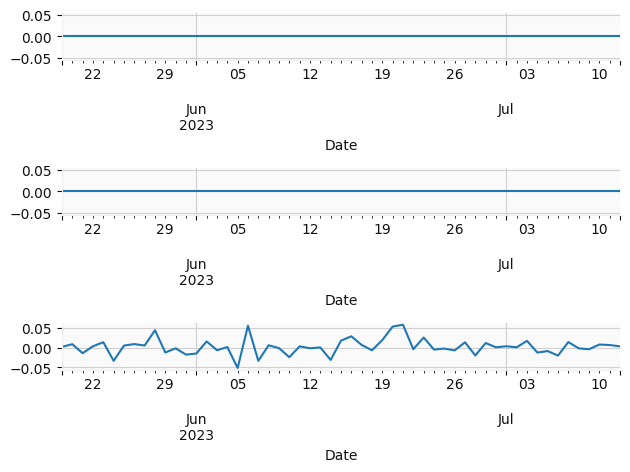

In [151]:
fig, ax = plt.subplots(3, 1)
df_test["auto_arima"].plot(ax=ax[0])
df_test["auto_sarima"].plot(ax=ax[1])
data['log_rtn'][-test_len:].plot(ax=ax[2])
sns.despine()
plt.tight_layout()

In [152]:
data['auto_arima_log_rtn']= pd.concat([df_train['log_rtn'], auto_arima.predict(test_len)])
pred_price_list = np.exp(data['auto_arima_log_rtn'].cumsum())

data['arima_pred_000'] = np.array(pred_price_list)* data['Adj Close'][0]
data['arima_pred_000'].tail(10),data['Adj Close'][-1]


(Date
 2023-07-03    26832.208984
 2023-07-04    26832.208984
 2023-07-05    26832.208984
 2023-07-06    26832.208984
 2023-07-07    26832.208984
 2023-07-08    26832.208984
 2023-07-09    26832.208984
 2023-07-10    26832.208984
 2023-07-11    26832.208984
 2023-07-12    26832.208984
 Name: arima_pred_000, dtype: float64,
 30723.244140625)

In [153]:
data['auto_sarima_log_rtn']= pd.concat([df_train['log_rtn'], auto_sarima.predict(test_len)])
pred_price_list = np.exp(data['auto_sarima_log_rtn'].cumsum())

data['sarima_pred_100'] = np.array(pred_price_list)* data['Adj Close'][0]
data['sarima_pred_100'].tail(10),data['Adj Close'][-1]


(Date
 2023-07-03    26832.208984
 2023-07-04    26832.208984
 2023-07-05    26832.208984
 2023-07-06    26832.208984
 2023-07-07    26832.208984
 2023-07-08    26832.208984
 2023-07-09    26832.208984
 2023-07-10    26832.208984
 2023-07-11    26832.208984
 2023-07-12    26832.208984
 Name: sarima_pred_100, dtype: float64,
 30723.244140625)

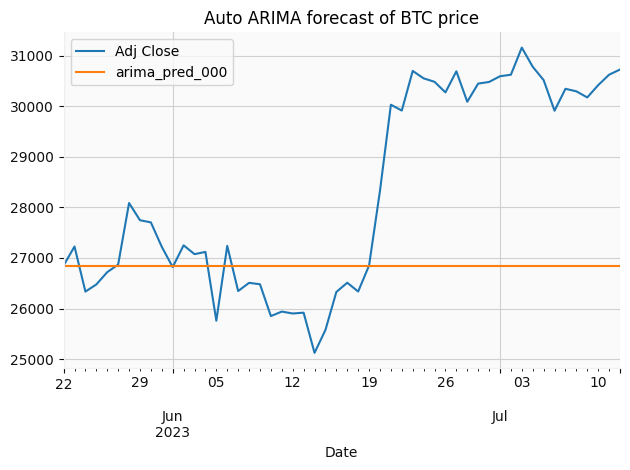

In [154]:
latest_data = data[data.index>'2023-05-20']


(
    latest_data[["Adj Close", 'arima_pred_000']].dropna()
    .iloc[1:]
    .plot(title="Auto ARIMA forecast of BTC price")
);

sns.despine()
plt.tight_layout()

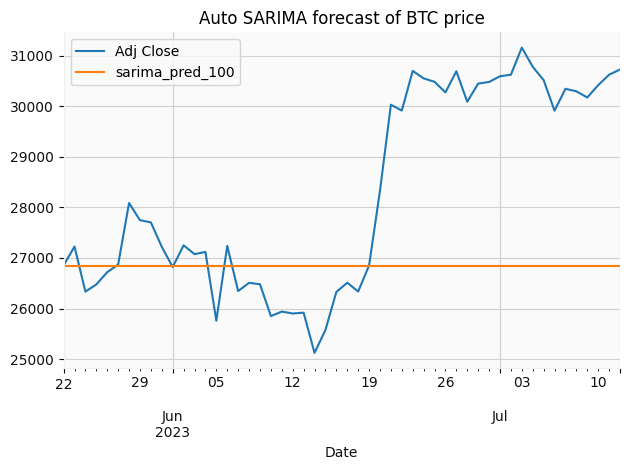

In [155]:
latest_data = data[data.index>'2023-05-20']


(
    latest_data[["Adj Close", 'sarima_pred_100']].dropna()
    .iloc[1:]
    .plot(title="Auto SARIMA forecast of BTC price")
);

sns.despine()
plt.tight_layout()

In [156]:
mape_auto_arima = mean_absolute_percentage_error(
    data["Adj Close"][-test_len:],
    data["arima_pred_000"][-test_len:]
)

mape_auto_sarima = mean_absolute_percentage_error(
    data["Adj Close"][-test_len:],
    data["sarima_pred_100"][-test_len:]
)

print(f"MAPE of auto-ARIMA: {100*mape_auto_arima:.2f}%")
print(f"MAPE of auto-SARIMA: {100*mape_auto_sarima:.2f}%")

MAPE of auto-ARIMA: 6.00%
MAPE of auto-SARIMA: 6.00%


### the best arima model for log_rtn is 2.0.2